<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/sports-analytics/blob/master/Xg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
src = list(files.upload().values())[0]
open('FCPython.py','wb').write(src)
from FCPython import createPitch

Saving FCPython.py to FCPython.py


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from FCPython import createPitch

In [14]:
with open("/content/drive/My Drive/Wyscout/events/events_England.json") as file:
  data=json.load(file)

In [16]:
train=pd.DataFrame(data)

In [19]:
train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [20]:
pd.unique(train.subEventName)

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [21]:
shots=train[train.subEventName=="Shot"]

In [22]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
...,...,...,...,...,...,...,...,...,...,...,...,...
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357
643055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",145692,"[{'y': 38, 'x': 92}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2381.481625,100,251596359


In [23]:
shots_model=pd.DataFrame(columns=["Goal","X","Y"])

In [24]:
shots_model

,Goal,X,Y


In [28]:
for i,shot in shots.iterrows():
  header=0
  for shottags in shot["tags"]:
    if shottags["id"]==403:
      header=1
  if not(header):
    shots_model.at[i,"X"]=100-shot["positions"][0]["x"]
    shots_model.at[i,"Y"]=shot["positions"][0]["y"]
    shots_model.at[i,"C"]=abs(shot["positions"][0]["y"]-50)

    x=shots_model.at[i,"X"]*105/100
    y=shots_model.at[i,"Y"]*65/100
    shots_model.at[i,"Distance"]=np.sqrt(x**2+y**2)
    a=np.arctan(7.32*x/(x**2+y**2-(7.32/2)**2))
    if a<0:
      a=np.pi+a
    shots_model[i,"Angle"]=a
    shots_model.at[i,"Goal"]=0
    for shottags in shot['tags']:
      if shottags['id']==101:
        shots_model.at[i,"Goal"]=1

In [29]:
h_shot=np.histogram2d(shots_model['X'],shots_model["Y"],bins=50,range=[[0,100],[0,100]])
goals_only=shots_model[shots_model["Goal"]==1]
h_goal=np.histogram2d(goals_only['X'],goals_only["Y"],bins=50,range=[[0,100],[0,100]])

In [31]:
from FCPython import createGoalMouth

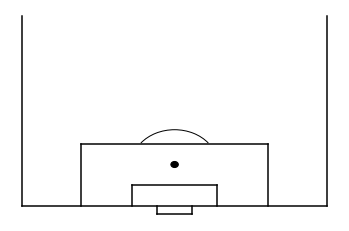

In [33]:
(fig,ax)=createGoalMouth()

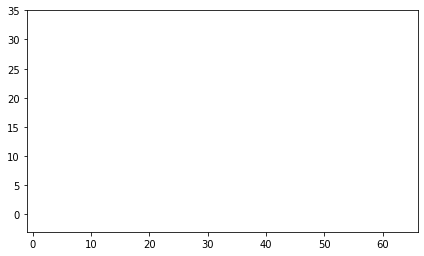

In [34]:
pos=ax.imshow(h_shot[0],extent=[-1,66,104,-1],aspect="auto",cmap=plt.cm.Reds)
fig.colorbar(pos,ax=ax)
ax.set_title("no. of shots")
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect("equal",adjustable="box")
plt.show()

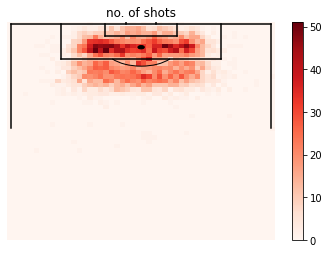

In [37]:
fig

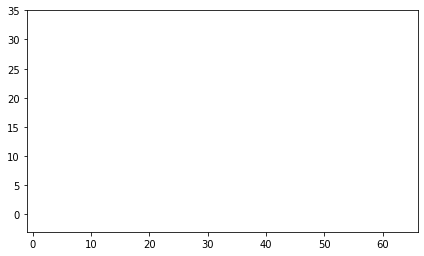

In [38]:
pos=ax.imshow(h_goal[0],extent=[-1,66,104,-1],aspect="auto",cmap=plt.cm.Reds)
fig.colorbar(pos,ax=ax)
ax.set_title("no. of shots")
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect("equal",adjustable="box")
plt.show()

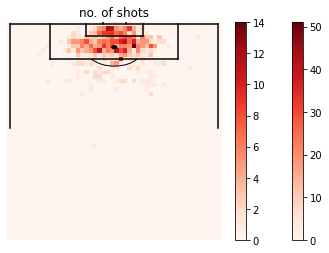

In [39]:
fig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


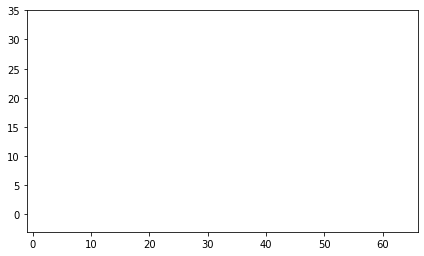

In [42]:
pos=ax.imshow(h_goal[0]/h_shot[0],extent=[-1,66,104,-1],aspect="auto",cmap=plt.cm.Reds,vmin=0,vmax=0.5)
fig.colorbar(pos,ax=ax)
ax.set_title("no. of shots")
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect("equal",adjustable="box")
plt.show()

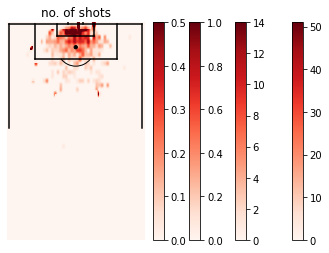

In [43]:
fig